# Molecule Envirnoment User Manual

### Imports

In [1]:
from gym_molecule.envs.molecule_env import MoleculeEnvironment as MolEnv
from gym_molecule.envs.action import Action


### Initialising _molecule_env_

In [2]:
my_env = MolEnv()

[]
No display found!


MoleculeEnvironment Initialises to a single carbon atom ('C')  we can display this by running render() method.

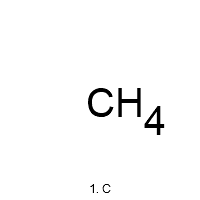

In [3]:
my_env.render()

Create Action and call setAction method to specify the step you want to perform.

In [4]:
action = Action()
action.setAction('Add',pos='back',mol='C(=O)O')

Call the step method with the action you want to perform as an argument

['SingleAtomDonor' 'SingleAtomAcceptor' 'SingleAtomAcceptor' 'AcidicGroup']


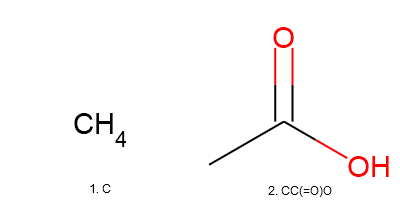

In [5]:
my_env.step(action)
my_env.render()

The first positional argument specifies whether you want 'add' or 'remove' a feature. You can set the Atom / molecular substructure by setting the mol to a SMILES string  specify where you want to add the smile string by setting pos as 'front' or 'back'. 

['Arom6' 'RH6_6']


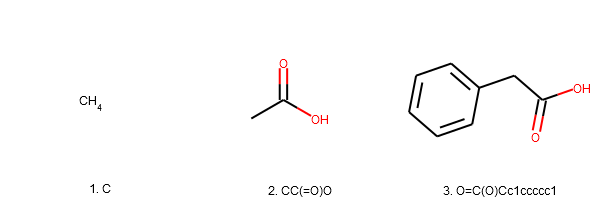

In [6]:
action.setAction('Add',pos='front',mol='C1=CC=CC=C1')
my_env.step(action)
my_env.render()

### Adding elements to a molecule

As seen below we using the arguments to specify action, position and substructur/atom to be added. In order to add we set 'add' in the first positional argument position.

['SingleAtomDonor' 'SingleAtomAcceptor' 'SingleAtomAcceptor' 'AcidicGroup']


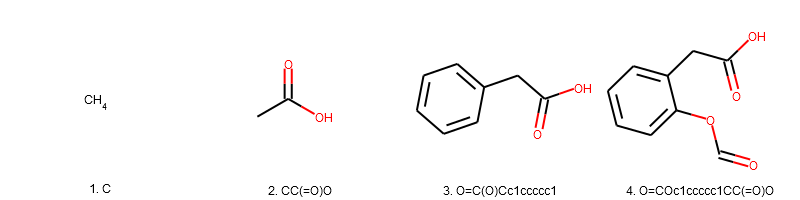

In [7]:
action.setAction('Add',pos='front',mol='C(=O)O')
my_obs = my_env.step(action)
my_env.render()

['ChainTwoWayAttach']


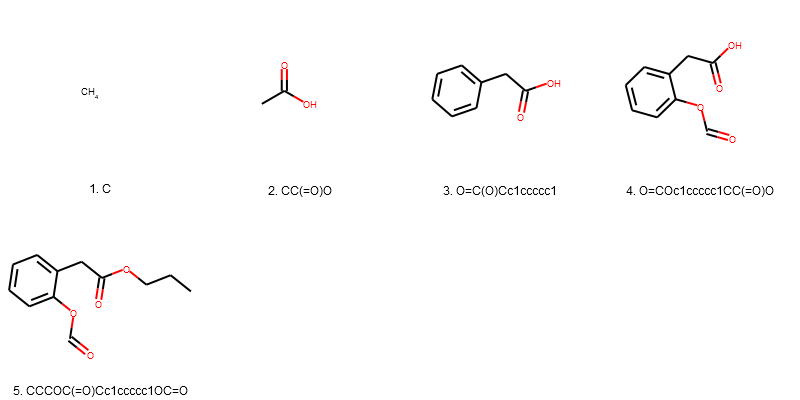

In [8]:
action.setAction('Add',pos='back',mol='CCC')
my_obs = my_env.step(action)
my_env.render()

### Removing elements to a molecule

As seen below we using the arguments to specify action, position and substructur/atom to be added. In order to remove we set 'remove' in the first positional argument position.

['ChainTwoWayAttach']


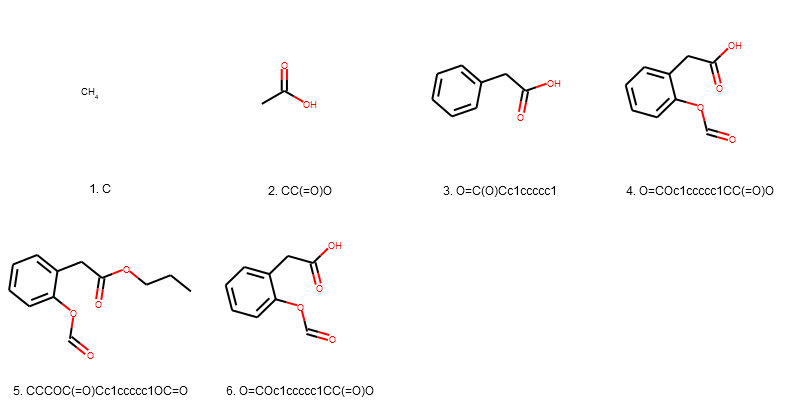

In [9]:
action.setAction('remove',pos='back',mol='CCC')
my_obs = my_env.step(action)
my_env.render()

#### Query remove

As seen below we using the arguments to specify action, position and substructur/atom to be added. In order to remove based on a specifc feature factor feature we set 'remove' in the first positional argument position and set query with a numpy array contain all the feature factory features you want to remove. The envirnoment will then remove the first feature the satisfys the features specified.

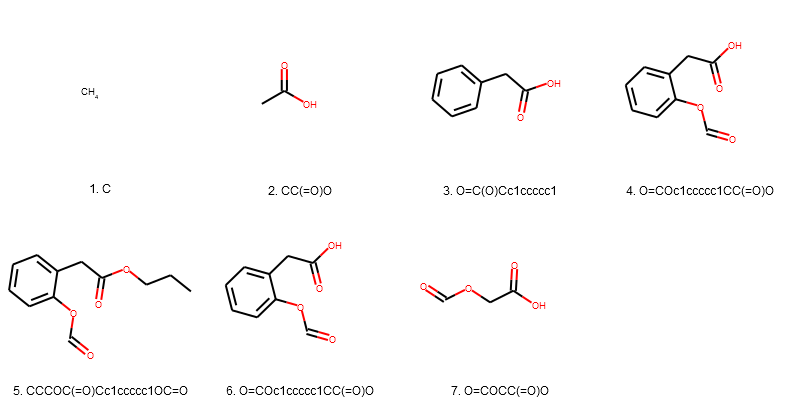

In [10]:
import numpy as np
action.setAction('remove',query=np.array(['Arom6'])) 
my_env.step(action)
my_env.render() 

In the example above we were able to remove a 6 atom aromatic ring a list of base featueres can be found in the BaseFeature.fdef file on github

### Decision making 

In order to make an educated decision on the next a reinforcement learning computer agent needs to decide on the next step based on observations. This is information is collected by step method. 

#### Observations

The step method returns two observations firstly the morgan finger print the in a unique identifyer and also categorises each 'feature' in the molecule. The morgan finger print is stored as an array of 1028 bits.

In [11]:
action.setAction('Add',pos='front',mol='C1=CC=C1') 
obs = my_env.step(action)
bits, info = obs.getInfo()

[]


In [12]:
print ('bits =' + str(bits))
print ('obs info =' + str (obs.getInfo()))

bits =(array([ 80, 145, 147, 225, 283, 330, 345, 356, 389, 501, 547, 650, 684,
       695, 713, 788, 807, 849, 862, 891, 893, 973, 980], dtype=int64),)
obs info =((array([ 80, 145, 147, 225, 283, 330, 345, 356, 389, 501, 547, 650, 684,
       695, 713, 788, 807, 849, 862, 891, 893, 973, 980], dtype=int64),), ['SingleAtomDonor', 'SingleAtomAcceptor', 'SingleAtomAcceptor', 'SingleAtomAcceptor', 'SingleAtomAcceptor', 'AcidicGroup', 'ZnBinder5', 'ThreeWayAttach'])


### Rendering 

By running setting ui option to true you are able to render with an interactive UI set the positional argument true.

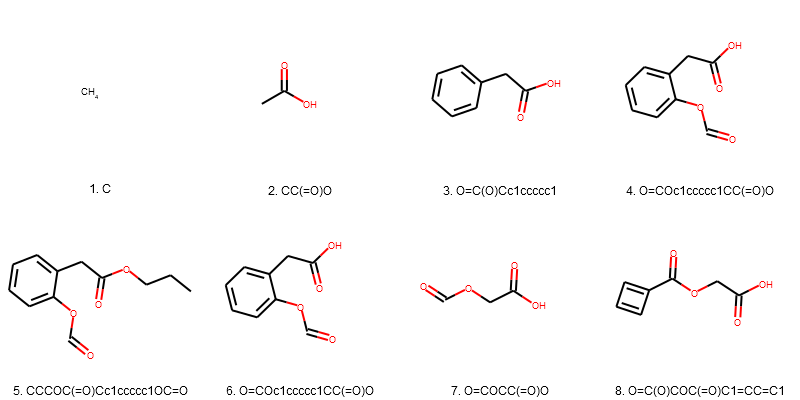

In [13]:
my_env.render(True)